### Problem 3

In [393]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acovf

In [394]:
start = datetime.datetime (1949, 12, 1)
end = datetime.datetime (2021, 12, 31)

fred = pdr.DataReader(['CPIAUCSL'], 'fred', start, end)

In [395]:
fred = fred.rename(columns = {'CPIAUCSL':'CPI'})

In [396]:
fred['CPI Log'] = fred.apply(np.log)

In [397]:
fred['CPI Log Diff'] = fred['CPI Log'].diff(1)

In [398]:
fred['Inflation Rate'] = fred['CPI Log Diff']*100*12

In [401]:
fred = fred[1:]

In [402]:
inflationrate = fred['CPI Log Diff'].array
inflationrate

<PandasArray>
[ -0.004244488545443126,   0.004244488545443126,  0.0012698414404761493,
 0.00042292240004426773,   0.005061166434160658,  0.0046170071522988465,
   0.007924963270579344,   0.005386381367660231,   0.005768454396740452,
   0.006552029991300223,
 ...
   0.006182376487946506,   0.007670858211099585,  0.0064215931666709025,
   0.009007867674829306,   0.004727148993326935,   0.002739893548826089,
    0.00411587897132204,   0.009388990335051695,   0.007760962202460142,
  0.0046935006886323904]
Length: 864, dtype: float64

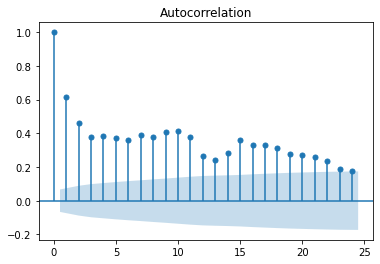

In [417]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(inflationrate[0:], lags=24)
pyplot.show()

In [418]:
inflationrate[0:]

<PandasArray>
[ -0.004244488545443126,   0.004244488545443126,  0.0012698414404761493,
 0.00042292240004426773,   0.005061166434160658,  0.0046170071522988465,
   0.007924963270579344,   0.005386381367660231,   0.005768454396740452,
   0.006552029991300223,
 ...
   0.006182376487946506,   0.007670858211099585,  0.0064215931666709025,
   0.009007867674829306,   0.004727148993326935,   0.002739893548826089,
    0.00411587897132204,   0.009388990335051695,   0.007760962202460142,
  0.0046935006886323904]
Length: 864, dtype: float64

In [419]:
import statsmodels.api as sm

#calculate autocorrelations
ac = sm.tsa.acf(inflationrate[0:], nlags=24, adjusted = False)
ac

C:\Users\rossd\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.61425709, 0.46039253, 0.37866001, 0.38188855,
       0.37389842, 0.36070704, 0.38780048, 0.37800523, 0.40538597,
       0.41398346, 0.37937075, 0.26726587, 0.24252242, 0.28539836,
       0.35756544, 0.33288689, 0.32769557, 0.31488714, 0.27874607,
       0.26941872, 0.25795638, 0.23851166, 0.19059216, 0.17542228])

In [420]:
from statistics import stdev
#calculate t statistic
tstat = ac.mean()/(stdev(ac)/(len(ac)**.5))
tstat

11.23495023863905

In [421]:
from statsmodels.tsa.stattools import adfuller

adfuller(ac)

(-1.4657174457399635,
 0.5503971687662371,
 2,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 -54.16053754102067)

In [422]:
ac[12]

0.26726586765978416

In [423]:
ac[12] * len(inflationrate)**(1/2)

7.855980017144252

In [424]:
inflationrate

<PandasArray>
[ -0.004244488545443126,   0.004244488545443126,  0.0012698414404761493,
 0.00042292240004426773,   0.005061166434160658,  0.0046170071522988465,
   0.007924963270579344,   0.005386381367660231,   0.005768454396740452,
   0.006552029991300223,
 ...
   0.006182376487946506,   0.007670858211099585,  0.0064215931666709025,
   0.009007867674829306,   0.004727148993326935,   0.002739893548826089,
    0.00411587897132204,   0.009388990335051695,   0.007760962202460142,
  0.0046935006886323904]
Length: 864, dtype: float64

## Dow Jones

In [183]:
%cd "C:\Users\rossd\OneDrive\Documents\UGA MSBA\Spring 2022\ECON 6760"

C:\Users\rossd\OneDrive\Documents\UGA MSBA\Spring 2022\ECON 6760


In [184]:
DJIA = pd.read_csv('DJIA.csv')

In [185]:
DJIA_close = DJIA[['Date','Close']]

In [186]:
DJIA_close = DJIA_close.set_index('Date')

In [187]:
DJIA_close['Log'] = DJIA_close.apply(np.log)

In [188]:
DJIA_close['Log Diff'] = DJIA_close['Log'].diff(1)

In [189]:
DJIA_close.head()

,Close,Log,Log Diff
Date,,,
1/8/2021,31097.97,10.344898,NaN
1/15/2021,30814.26,10.335733,-0.009165
1/22/2021,30996.98,10.341645,0.005912
1/29/2021,29982.62,10.308373,-0.033272
2/5/2021,31148.24,10.346513,0.038140


In [206]:
array_dj = DJIA_close['Log Diff'].array

In [207]:
array_dj

<PandasArray>
[                   nan,   -0.00916497389579618,   0.005912210537633911,
   -0.03327189993430757,   0.038139862384237944,   0.009908295269468681,
  0.0011411740079889654,   -0.01800400371438471,   0.018066870217387176,
    0.03990700512724921,  -0.004607187760143461,   0.013543715214694885,
   0.002425933326161811,   0.019339009287621778,   0.011766680709232702,
  -0.004606409630760311, -0.0049659737433991324,   0.026305250875912733,
   -0.01144114936131757,  -0.005082095097154848,   0.009357725533428507,
   0.006550856901483826,  -0.007995595198007521,   -0.03510839009201838,
      0.033780347065127,    0.01018526668111086,  0.0024063806941523325,
  -0.005241967602659159,    0.01071560689586093,  -0.003602442971178732,
   0.007785169277598314,   0.008678027348762996,  -0.011192795428232927,
   0.009513803646035157, -0.0024485754463619003,  -0.021761496305236605,
 -0.0006601862288615479,   0.006143321530299062,  -0.013643428519284129,
   0.012155167173398596,   0.01566285

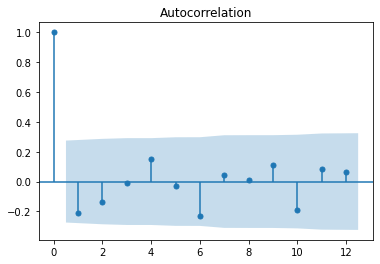

In [208]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(array_dj[1:], lags=12)
pyplot.show()

In [209]:
import statsmodels.api as sm

#calculate autocorrelations
dj_ac = sm.tsa.acf(array_dj[1:], nlags=12, adjusted = True)
dj_ac

C:\Users\rossd\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.21208126, -0.13992309, -0.01137658,  0.16378477,
       -0.03661895, -0.26258648,  0.04756282,  0.01164214,  0.13305671,
       -0.23541734,  0.11081672,  0.08697488])

In [210]:
#autocovariances
sm.tsa.stattools.acovf(array_dj[1:], nlag=12, adjusted = True)

C:\Users\rossd\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 2.69012953e-04, -5.70526066e-05, -3.76411231e-05, -3.06044674e-06,
        4.40602233e-05, -9.85097235e-06, -7.06391645e-05,  1.27950149e-05,
        3.13188663e-06,  3.57939772e-05, -6.33303127e-05,  2.98111321e-05,
        2.33973693e-05])

## DJIA 2

In [211]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("DJIA", start="2000-01-01", end="2021-12-31")[['Close']]
data.index = pd.to_datetime(data.index)

[*********************100%***********************]  1 of 1 completed


In [233]:
data[0:10]

,Close
Date,
2000-01-03,11357.509766
2000-01-04,10997.929688
2000-01-05,11122.650391
2000-01-06,11253.259766
2000-01-07,11522.559570
2000-01-10,11572.200195
2000-01-11,11511.080078
2000-01-12,11551.099609
2000-01-13,11582.429688


In [234]:
data2 = data.resample('W').last()

In [236]:
data2['Log'] = data2.apply(np.log)

In [237]:
data2['Log Diff'] = data2['Log'].diff(1)

In [239]:
data2.head()

,Close,Log,Log Diff
Date,,,
2000-01-09,11522.559570,9.352062,NaN
2000-01-16,11722.980469,9.369306,0.017244
2000-01-23,11251.709961,9.328275,-0.041031
2000-01-30,10738.870117,9.281625,-0.046650
2000-02-06,10963.799805,9.302354,0.020729


In [249]:
array_data2 = data2['Log Diff'].array

In [267]:
last_52 = array_data2[-52:]

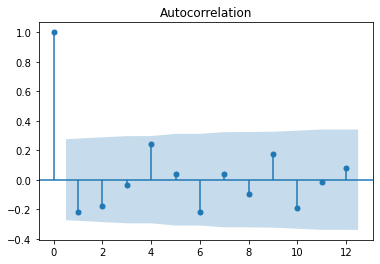

In [268]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(last_52[1:], lags=12)
pyplot.show()

In [269]:
import statsmodels.api as sm

#calculate autocorrelations
data2_ac = sm.tsa.acf(last_52[1:], nlags=52,adjusted = False)
data2_ac

C:\Users\rossd\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.21985272, -0.17898882, -0.03731422,  0.24480215,
        0.0386277 , -0.22080108,  0.04091437, -0.09649163,  0.17610658,
       -0.18851965, -0.01309792,  0.07666779,  0.12867184, -0.29107465,
        0.13603736,  0.18644686, -0.00648728, -0.19625754, -0.03318268,
        0.21640265, -0.17993137,  0.08381919, -0.14274278, -0.01837935,
       -0.01204552,  0.01924237, -0.0562827 , -0.02312049,  0.05578683,
       -0.05132729,  0.03557062,  0.0697506 , -0.01417641, -0.01203037,
        0.03989264, -0.04893187,  0.00750774, -0.02269605,  0.02516231,
       -0.06144109,  0.03235539,  0.01919387,  0.00391799, -0.00196158,
       -0.01474352,  0.00374287, -0.00812167,  0.01420499, -0.0024571 ,
       -0.00236732])

In [263]:
data2_ac[1]*len(data2['Close'])**.5

-2.4845730287188372

In [264]:
data2_ac[1]

-0.07352223733466276